<a href="https://colab.research.google.com/github/evi03/PCVK_Semester5/blob/main/Kuis2_PCVK_Evi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Kelompok 2**

* **Evi Amalia Midfia (2141720030/13)**

1. Mengerjakan secara kelompok yang terdiri dari 3 anggota
2. Kumpulkan e-ktp anggota keluarga pada kelompok minimal 9 buah sebagai dataset.
3. deteksi dan kenali foto wajah e-ktp tersebut menggunakan metode yang telah dipelajari baik pada matakulilah PCVK ataupun matakuliah lain pada semester ini.
4. Presentasikan di depan kelas hasil dari pekerjaan kelompok Anda, paparkan hasil dari pekerjaan tersebut secara detail lengkap dengan tangkapan layar bagian dari; (1)pre-processing, (2)lokalisasi, (3)segmentasi, dan (4)pengenalan.
5. jangan lupa upload juga kode program tersebut pada repository
kumpulkan link file presentasi dalam bentuk pdf dan link repository.

### **Pre-processing**



In [1]:
import os
import cv2
import matplotlib.pyplot as plt

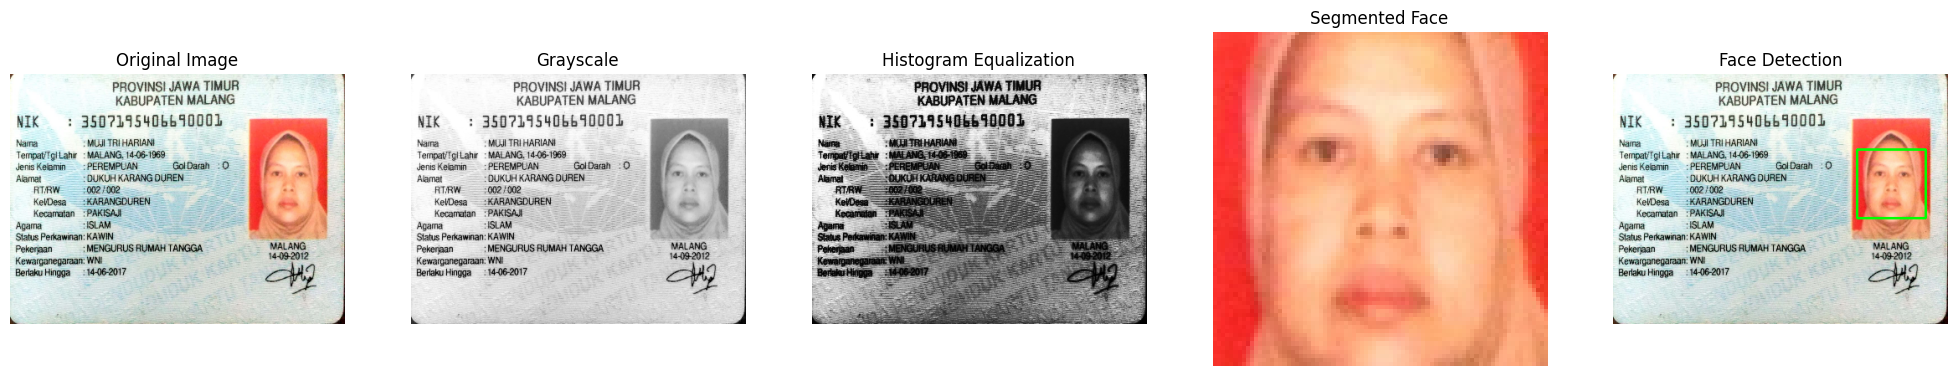

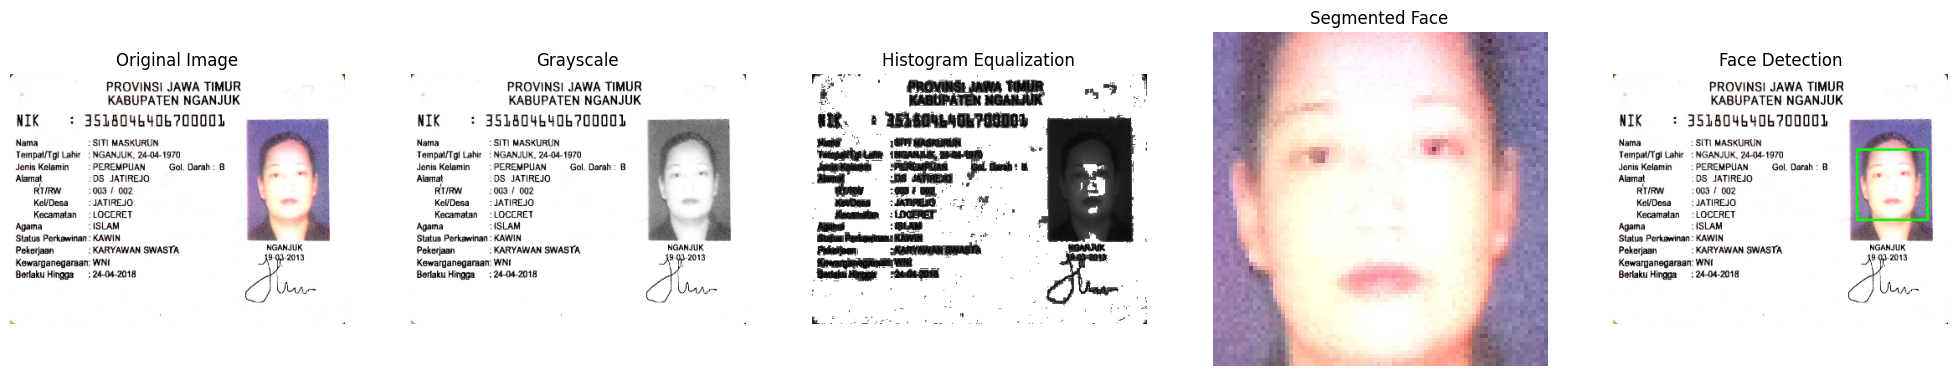

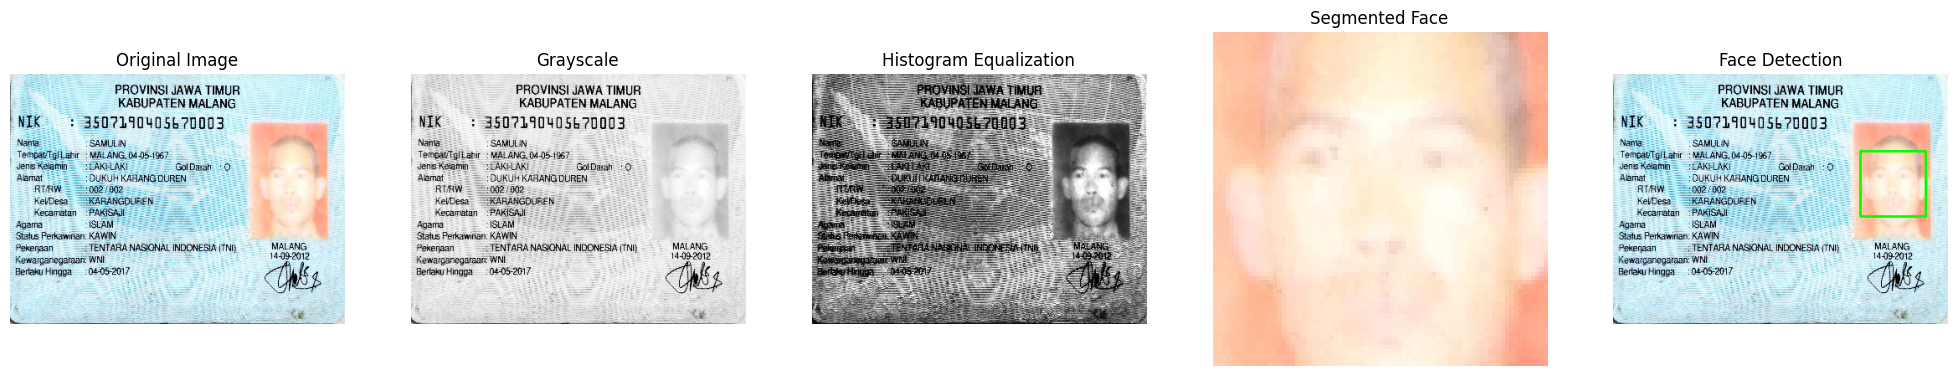

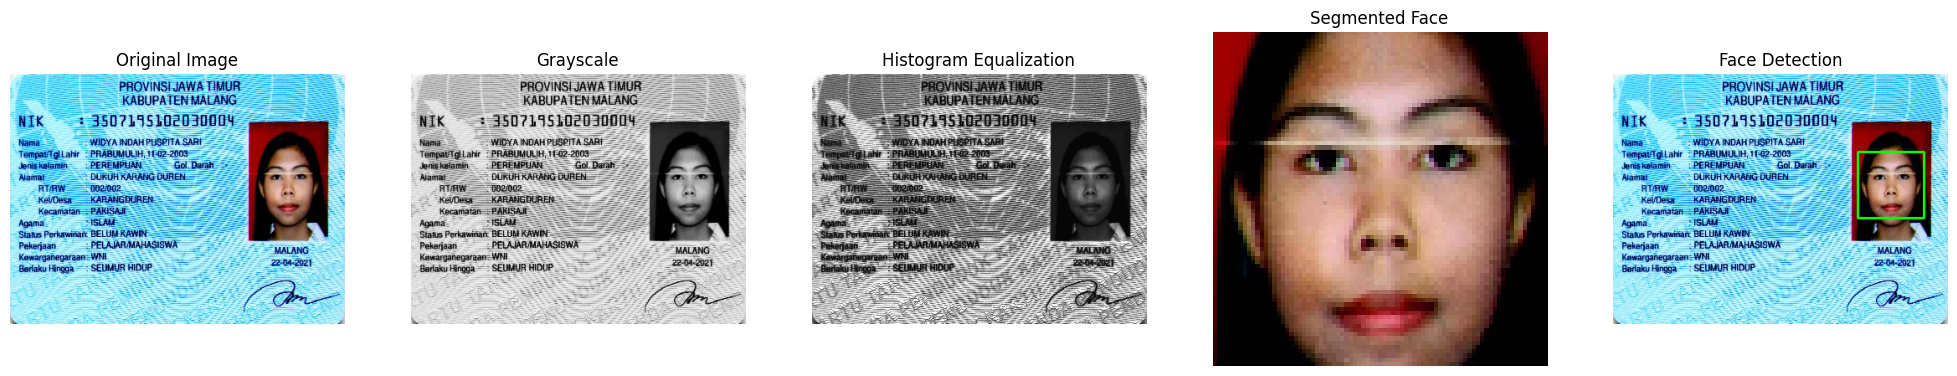

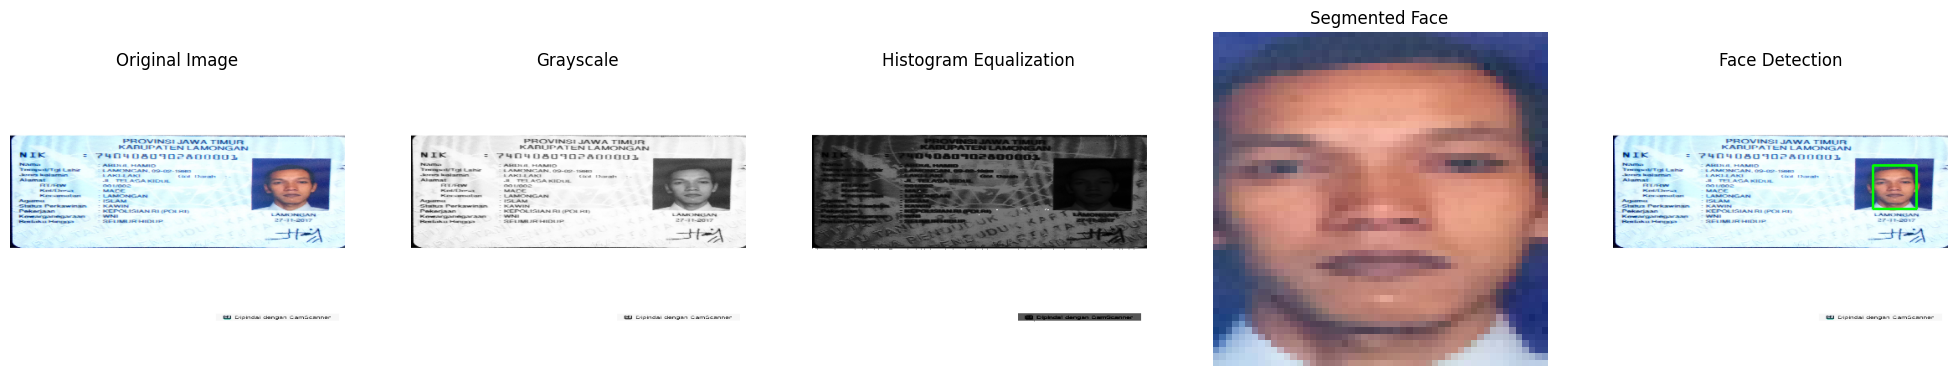

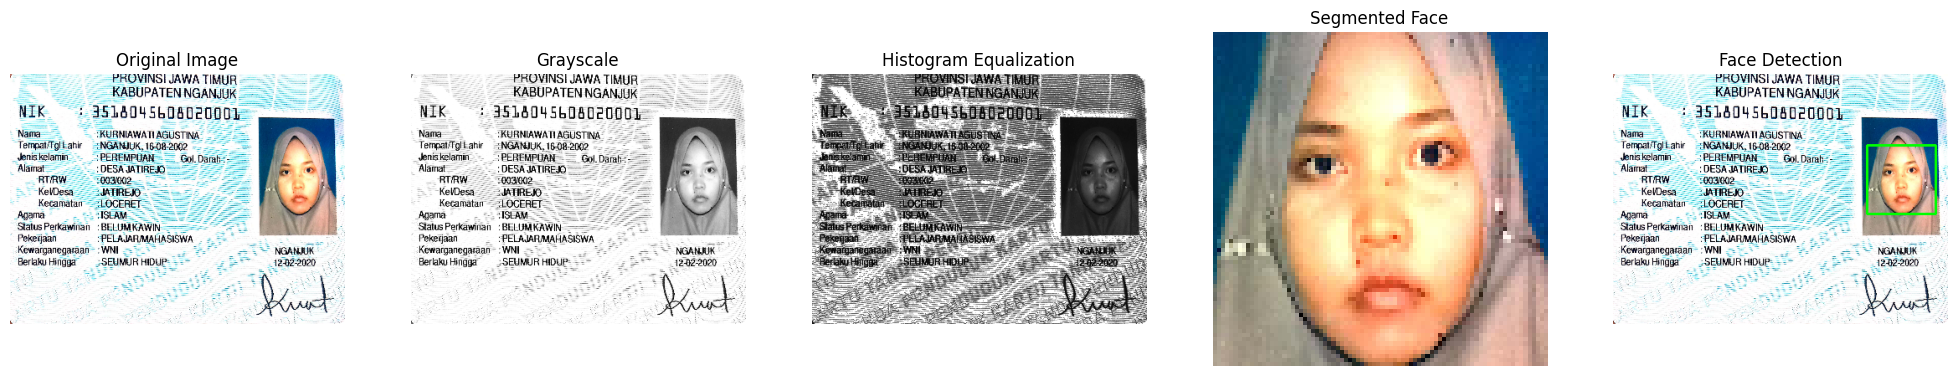

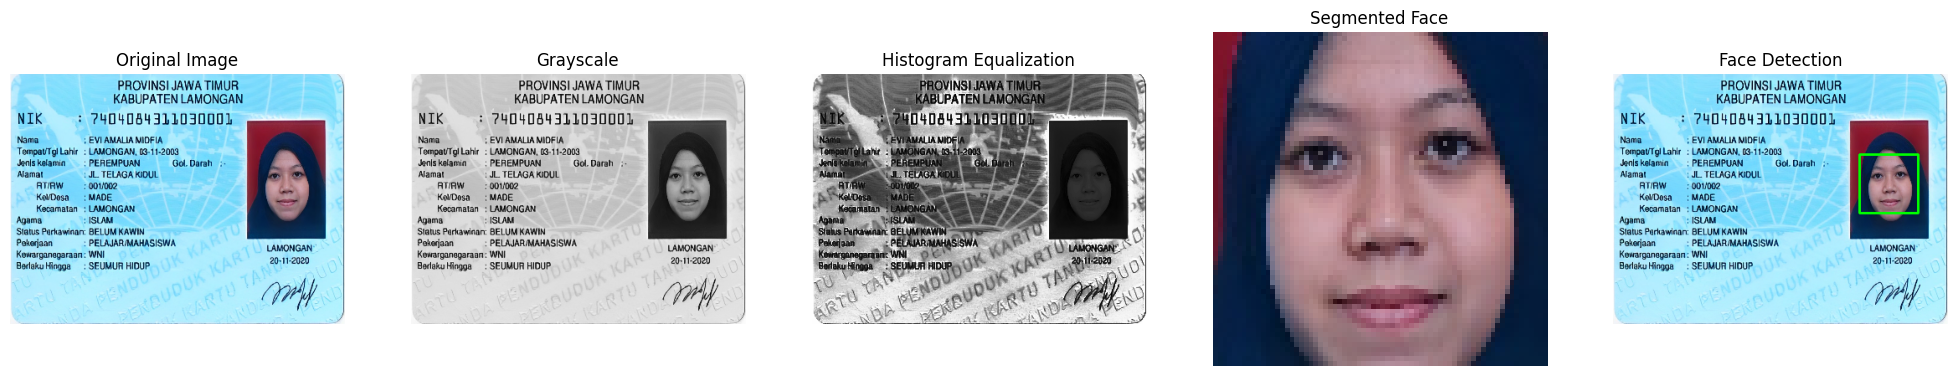

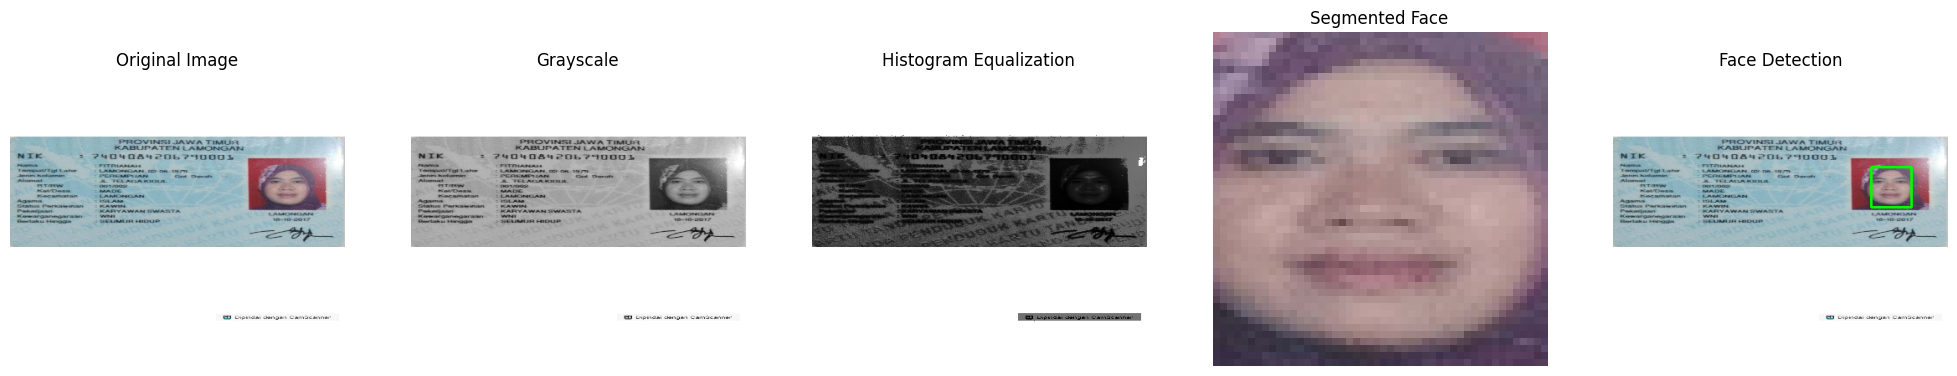

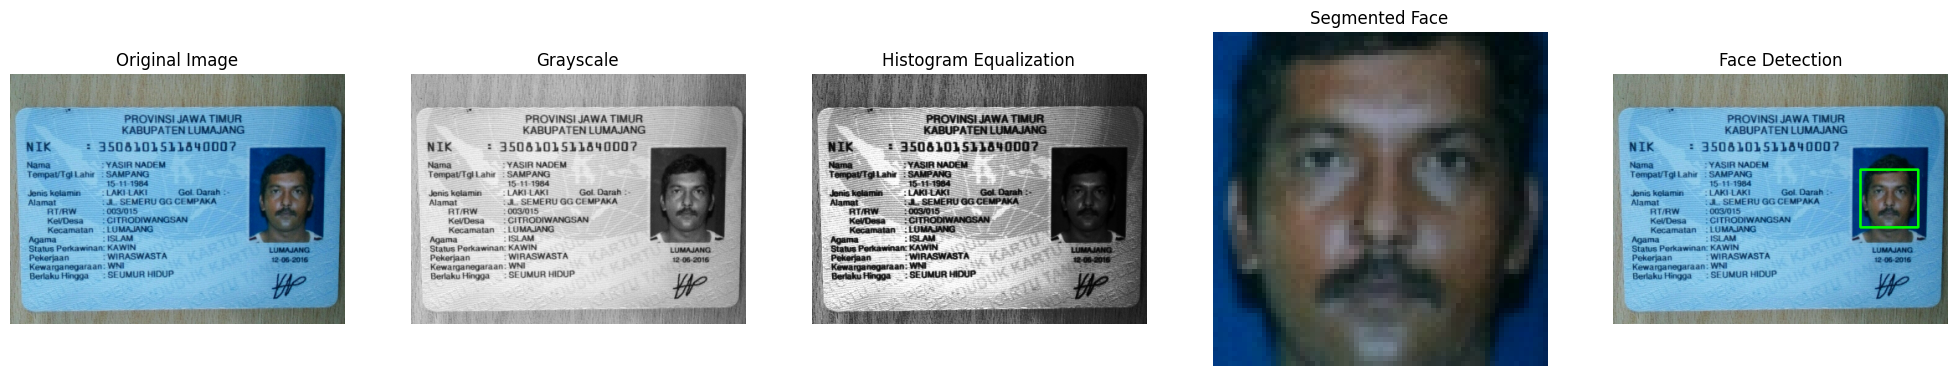

In [2]:
# Direktori tempat gambar-gambar berada
direct_data = '/content/drive/MyDrive/Tugas Kuliah /PCVK/KTP KUIS 2'

# Menggunakan os.listdir untuk mengambil daftar file dalam direktori
files = os.listdir(direct_data)

# Pengklasifikasi Haar Cascade untuk deteksi wajah
cascade_wajah = cv2.CascadeClassifier('/content/drive/MyDrive/Tugas Kuliah /PCVK/week12/haarcascade_frontalface_alt.xml')

# Loop semua gambar dalam direktori
for i, img_file in enumerate(files, start=1):
    img_path = os.path.join(direct_data, img_file)
    img = cv2.imread(img_path)

    # LANGKAH PREPROCESSING
    # (1) Ubah ukuran gambar
    img = cv2.resize(img, (400, 300))

    # (2) Konversikan ke Skala Abu-abu (Grayscale)
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # (3) Histogram Equalization
    equalized_img = cv2.equalizeHist(gray_img)

    # (4) Lokalisasi (Face Detection)
    faces = cascade_wajah.detectMultiScale(img, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # LANGKAH SEGEMENTASI DAN RECOGNIZATION
    for (x, y, w, h) in faces:
        # (5) Segmentasi (Crop Wajah)
        face_segment = img[y:y+h, x:x+w]

        # Menampilkan hasil segmentasi dan pengenalan wajah
        plt.figure(figsize=(25, 6)) # Penempatan plot atau elemen visual di mana lebarnya adalah 25 inch dan tingginya adalah 6 inch.

        # Bagian output gambar asli
        plt.subplot(151)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title('Original Image')
        plt.axis('off')

        # Bagian output Grayscale image (PREPROCESSING)
        plt.subplot(152)
        plt.imshow(gray_img, cmap='gray')
        plt.title('Grayscale')
        plt.axis('off')

        # Bagian output Histogram Equalized Image (PREPROCESSING)
        plt.subplot(153)
        plt.imshow(equalized_img, cmap='gray')
        plt.title('Histogram Equalization')
        plt.axis('off')

        # Bagian output gambar Segmentasi Wajah
        plt.subplot(154)
        plt.imshow(cv2.cvtColor(face_segment, cv2.COLOR_BGR2RGB))
        plt.title('Segmented Face')
        plt.axis('off')

        # Bagian output gambar dengan kotak di sekitar wajah (Lokalisasi - Face Detection)
        img_with_boxes = img.copy()
        cv2.rectangle(img_with_boxes, (x, y), (x+w, y+h), (0, 255, 0), 2)
        plt.subplot(155)
        plt.imshow(cv2.cvtColor(img_with_boxes, cv2.COLOR_BGR2RGB))
        plt.title('Face Detection')
        plt.axis('off')

        plt.show()


1. **Mengambil Gambar dari Direktori**
> Pertama kode diatas mencari dan mengambil daftar gambar dari sebuah direktori "KTP KUIS 2" pada GDrive yang dimana dalam direktori tersebut sudah terdapat 9 sampel dari masing-masing anggota kelompok.

2. **Deteksi Wajah**
> Deteksi wajah menggunakan algoritma Haar Cascade. Proses ini berfungsi untuk mengidentifikasi lokasi wajah dalam setiap gambar.

3. **Proses Preprocessing**
> Kemudian gambar-gambar sampel KTP melalui proses Preprocessing. Termasuk pengubahan ukuran gambar, konversi ke skala abu-abu, dan pemerataan histogram untuk memperjelas detail wajah yang tersembunyi.

4. **Segmentasi Wajah**
> Setelah deteksi wajah, kemudian gambar KTP akan dicrop sehingga hanya bagian wajah yang akan diproses lebih lanjut.

5. **Visualisasi Langkah-langkah**
> Langkah terakhir adalah menampilkan visualisasi dari proses-proses yang telah dilakukan. Outputnya terdapat gambar asli, gambar dalam skala abu-abu, hasil Histogram Equalization, gambar wajah yang tersegmentasi, dan juga gambar dengan kotak di sekitar wajah sebagai indikasi dari deteksi.

**Kesimpulan:** Kode diatas bertujuan untuk memahami bagaimana komputer bisa "melihat" dan mengenali wajah dalam gambar dengan menggunakan beberapa teknik pemrosesan gambar.